In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [18]:
path = (r"/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/02 Feature Selection/datasets/Data-Files-for-Feature-Selection/santander-train.csv")
data = pd.read_csv(path , nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [19]:
X = data.drop("TARGET" , axis = 1)
y = data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0 , stratify = y)

## Remove Constant , Quasi-Constant and Duplicate Features

In [0]:
# Remove constant and quasi-constant features
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [23]:
X_train_filter.shape , X_test_filter.shape

((16000, 245), (4000, 245))

In [0]:
# Remove the Duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [0]:
X_train_T =pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [26]:
X_train_T.duplicated().sum()

18

In [0]:
duplicated_features = X_train_T.duplicated()

In [0]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [31]:
X_train_unique.shape , X_train.shape

((16000, 227), (16000, 370))

## Now Calculating the ROC_AUC score


In [0]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100 , random_state = 0)
    clf.fit(X_train_unique[feature].to_frame(),y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test , y_pred))

In [34]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [0]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending = False ,inplace = True )

In [38]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

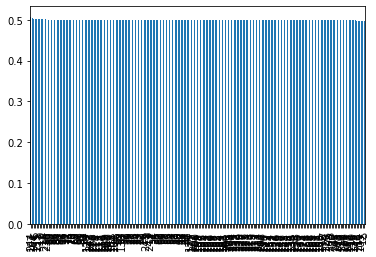

In [39]:
roc_values.plot.bar()

In [40]:
# Selecting the ones with ROC values > 0.5
sel = roc_values[roc_values > 0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [0]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

## Build the model and compare the model performances

In [0]:
def run_randomForest(X_train , X_test , y_train , y_test):
    clf = RandomForestClassifier(n_estimators= 100 , random_state= 0, n_jobs=-1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print("Accuract on the test set: ", accuracy_score(y_test , y_pred))

In [46]:
%%time
run_randomForest(X_train_roc , X_test_roc , y_train , y_test)

Accuract on the test set:  0.95275
CPU times: user 4.02 s, sys: 34.9 ms, total: 4.05 s
Wall time: 2.15 s


In [47]:
X_train_roc.shape

(16000, 11)

In [48]:
%%time
run_randomForest(X_train , X_test , y_train , y_test)

Accuract on the test set:  0.9585
CPU times: user 6.28 s, sys: 28.5 ms, total: 6.31 s
Wall time: 3.31 s


## Feature Selection using RMSE Regression

In [0]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [52]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
X = pd.DataFrame(data= boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y = boston.target

In [0]:
# Stratify doesn't work for regression problems
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [0]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame() , y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))

In [58]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731933,
 78.30831374720844,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [60]:
mse = pd.Series(mse , index = X_train.columns)
mse.sort_values(ascending = False , inplace = True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

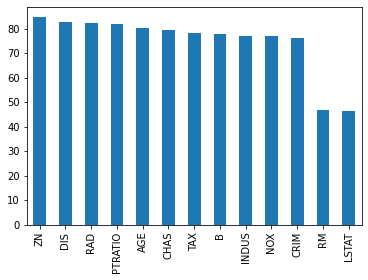

In [61]:
mse.plot.bar()

In [0]:
X_train_2 = X_train[["RM","LSTAT"]]
X_test_2 = X_test[["RM","LSTAT"]]

In [67]:
%%time
model = LinearRegression()
model.fit(X_train_2 , y_train )
y_pred = model.predict(X_test_2)
print("r2_score" , r2_score(y_test,y_pred))
print("rmse: " , np.sqrt(mean_squared_error(y_test , y_pred)))
print("sd of jouse price: ", np.std(y))

r2_score 0.5409084827186418
rmse:  6.114172522817781
sd of jouse price:  9.188011545278203
CPU times: user 4.24 ms, sys: 3 µs, total: 4.24 ms
Wall time: 3.79 ms


In [68]:
%%time
model = LinearRegression()
model.fit(X_train , y_train )
y_pred = model.predict(X_test)
print("r2_score" , r2_score(y_test,y_pred))
print("rmse: " , np.sqrt(mean_squared_error(y_test , y_pred)))
print("sd of jouse price: ", np.std(y))

r2_score 0.5892223849182512
rmse:  5.783509315085133
sd of jouse price:  9.188011545278203
CPU times: user 3.47 ms, sys: 1 ms, total: 4.47 ms
Wall time: 3.91 ms
